In [1]:
!pip install gensim


In [40]:
import gensim
import pandas as pd
import gensim.downloader


Part 1: Word Embeddings

In [3]:
# Load pre-trained Word2Vec model trained on wikipedia data

model = gensim.downloader.load("glove-wiki-gigaword-100")
# Getting the vector for a word

dog = model['freedom']

# Getting the most similar words

print(model.most_similar('freedom'))

# Getting the similarity between two words

print(model.similarity('freedom', 'democracy'))


[('freedoms', 0.7783921360969543), ('rights', 0.7624185085296631), ('democracy', 0.73871248960495), ('liberty', 0.7168192267417908), ('independence', 0.7036619782447815), ('equality', 0.7002560496330261), ('dignity', 0.6816196441650391), ('liberties', 0.6800701022148132), ('respect', 0.6753633618354797), ('free', 0.6614599823951721)]
0.7387126


Part 1a

In [7]:

#find the most similar words to a word of your choice. 
print(model.most_similar('car'))
#Does the result make sense? Look up some of the words if you don't know them
#Share and discuss with your group
#I got 'vehicle,' 'trucks,' 'cars,' 'driver,' and 'driving' and more as the most similar words to 'car.' This makes sense since they all relate directly to types of vehicles or actions associated with cars. It's interesting to see how both specific (like 'trucks') and general (like 'vehicle') terms show up, reflecting different aspects of the concept of a car. Did anyone get words that weren't directly related to vehicles? I'm curious if changing the context could bring up other associations!

[('vehicle', 0.8630837798118591), ('truck', 0.8597878813743591), ('cars', 0.837166965007782), ('driver', 0.8185911178588867), ('driving', 0.781263530254364), ('motorcycle', 0.7553158402442932), ('vehicles', 0.7462256550788879), ('parked', 0.74594646692276), ('bus', 0.7372707724571228), ('taxi', 0.7155268788337708)]


In [8]:

#we can extract a "capital vector" by subtracting the vector for a country from the vector for its capital
capital= model["berlin"]-model['germany']

fra_capital=model["france"]+capital

print(model.most_similar(fra_capital))
#likewise, we can extract a "plural vector" by subtracting the vector for a singular noun from the vector for its plural
plural=model["cats"]-model["cat"]

print(model.most_similar(plural))

#we can also add vectors together
plural_dogs=model["dog"]+plural

print(model.most_similar(plural_dogs))



[('paris', 0.8827144503593445), ('france', 0.755802571773529), ('french', 0.7075165510177612), ('prohertrib', 0.6943174004554749), ('berlin', 0.666556179523468), ('brussels', 0.6574430465698242), ('lyon', 0.6526200175285339), ('london', 0.64079749584198), ('le', 0.6403627991676331), ('strasbourg', 0.6346526741981506)]
[('lowlanders', 0.4844588041305542), ('zebras', 0.45914992690086365), ('dicots', 0.45332765579223633), ('non-arabs', 0.45208773016929626), ('amerindians', 0.4478238821029663), ('buffalos', 0.4475123882293701), ('giraffes', 0.4466330111026764), ('bavarians', 0.4452260732650757), ('welshmen', 0.4440663158893585), ('dingos', 0.44403284788131714)]
[('dogs', 0.8921768665313721), ('cats', 0.8814380764961243), ('dog', 0.7873796820640564), ('animals', 0.7512701153755188), ('pets', 0.7392117977142334), ('cows', 0.6835323572158813), ('pet', 0.679297685623169), ('horses', 0.6774964332580566), ('pigs', 0.6755765080451965), ('animal', 0.6683686971664429)]


In [9]:
# this can be used to find examples of data bias in word embeddings

# for example, we can find the most similar words to "doctor" and "nurse"

gender=model["women"]-model["man"]

print(model.most_similar(gender))
print(model.most_similar(-gender))

model.most_similar(model["doctor"]+gender)



[('women', 0.5936868786811829), ('post-menopausal', 0.5880484580993652), ('cedaw', 0.5388618111610413), ('premenopausal', 0.5339736938476562), ('ululating', 0.5263110995292664), ('underrepresented', 0.5224738121032715), ('lesbians', 0.5211073160171509), ('aiaw', 0.511288583278656), ('antenatal', 0.5063314437866211), ('postmenopausal', 0.501008927822113)]
[('thief', 0.5128416419029236), ('hitman', 0.4305824041366577), ('cabdriver', 0.4205518066883087), ('slapper', 0.41808873414993286), ('stonemason', 0.4178698658943176), ('informer', 0.41766634583473206), ('rancher', 0.4157513976097107), ('speculator', 0.41537293791770935), ('mechanic', 0.4112204611301422), ('gambler', 0.4091060161590576)]


[('women', 0.7597994804382324),
 ('physicians', 0.7104339599609375),
 ('doctors', 0.6946384310722351),
 ('nurses', 0.6652523279190063),
 ('patients', 0.6637681722640991),
 ('medical', 0.6547445058822632),
 ('medicine', 0.6364367008209229),
 ('clinics', 0.6251500844955444),
 ('nursing', 0.623295783996582),
 ('doctor', 0.6138885617256165)]

Part 1b

In [12]:
#try to isolate a specific dimension in the embeddings and add it to multiple words. 
# Define the "wealth/status" dimension by subtracting 'poor' from 'rich'
wealth = model["rich"] - model["poor"]

# Add the wealth/status dimension to different words
wealthy_profession = model["teacher"] + wealth
wealthy_location = model["city"] + wealth
wealthy_vehicle = model["car"] + wealth

# Check the most similar words to each
print("Most similar to 'wealthy teacher':", model.most_similar(wealthy_profession))
print("Most similar to 'wealthy city':", model.most_similar(wealthy_location))
print("Most similar to 'wealthy car':", model.most_similar(wealthy_vehicle))

#does this show any bias or assumptions in the data? 
wealth=model["rich"]-model["poor"]

print(model.most_similar(wealth))
print(model.most_similar(-wealth))

model.most_similar(model["teacher"]+wealth)

# Discuss with your group and share most interesting dimension in the document
#Yes, this example can reveal biases or assumptions in the data about wealth and social status. By adding a "wealth" vector (isolated by subtracting "poor" from "rich") to words like "teacher," "city," or "car," the model may associate these terms with wealth-related concepts, potentially showing biases about socioeconomic status. For exmaple: Adding the "wealth" vector to "teacher" result in associations that lean toward higher-paying or prestigious occupations, suggesting assumptions about wealthier professions. If "teacher" returns words like "rich", "author", "musician"



Most similar to 'wealthy teacher': [('teacher', 0.6680964827537537), ('rich', 0.5727817416191101), ('writer', 0.5442888736724854), ('student', 0.5289105176925659), ('educator', 0.5216258764266968), ('poet', 0.5188855528831482), ('friend', 0.517753541469574), ('taught', 0.5149722099304199), ('musician', 0.5136235952377319), ('author', 0.5125022530555725)]
Most similar to 'wealthy city': [('city', 0.757881224155426), ('town', 0.6408730149269104), ('rich', 0.629729151725769), ('southern', 0.6000362634658813), ('northern', 0.5800671577453613), ('cities', 0.579162061214447), ('where', 0.571696937084198), ('capital', 0.565071702003479), ('downtown', 0.5610560178756714), ('located', 0.5568658113479614)]
Most similar to 'wealthy car': [('car', 0.7313538789749146), ('truck', 0.6439815163612366), ('vehicle', 0.6040875911712646), ('cars', 0.5820707678794861), ('jeep', 0.5790131688117981), ('suv', 0.5755172371864319), ('minivan', 0.5669410824775696), ('mercedes', 0.5479639768600464), ('parked', 0.

[('teacher', 0.6680964827537537),
 ('rich', 0.5727817416191101),
 ('writer', 0.5442888736724854),
 ('student', 0.5289105176925659),
 ('educator', 0.5216258764266968),
 ('poet', 0.5188855528831482),
 ('friend', 0.517753541469574),
 ('taught', 0.5149722099304199),
 ('musician', 0.5136235952377319),
 ('author', 0.5125022530555725)]

Part 2: Visualization and Embeddings in Space

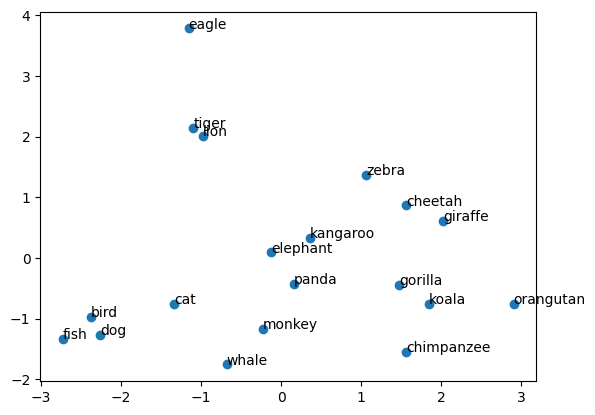

In [13]:
#visualize pca of word embeddings

from sklearn.decomposition import PCA

import matplotlib.pyplot as plt

words=["dog","cat","fish", "whale", "bird", "eagle", "lion", "tiger", "cheetah", "elephant", "giraffe", "zebra", "kangaroo", "koala", "panda", "monkey", "gorilla", "chimpanzee", "orangutan", ]

X=[model[word] for word in words]

#identify clusters of words in the word embeddings at high dimensions

pca=PCA(n_components=2)

X_pca=pca.fit_transform(X)

plt.scatter(X_pca[:,0],X_pca[:,1])

for i, word in enumerate(words):
    plt.annotate(word, (X_pca[i,0],X_pca[i,1]))

plt.show()

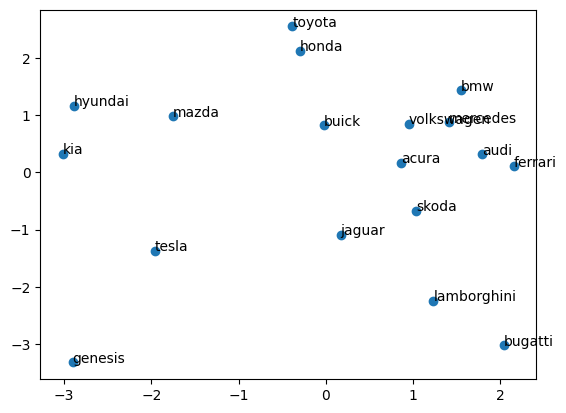

In [16]:
#repeat this process with your own set of 10-20 words. 
#Does the proximity between words and overall distances make sense? Work as a group and discuss your individual findings.
words=["ferrari","toyota","mazda", "audi", "bmw", "mercedes", "lamborghini", "hyundai", "honda", "bugatti", "volkswagen", "kia", "genesis", "jaguar", "acura", "tesla", "buick", "skoda" ]

X=[model[word] for word in words]

#identify clusters of words in the word embeddings at high dimensions

pca=PCA(n_components=2)

X_pca=pca.fit_transform(X)

plt.scatter(X_pca[:,0],X_pca[:,1])

for i, word in enumerate(words):
    plt.annotate(word, (X_pca[i,0],X_pca[i,1]))

plt.show()

#After seeing result we are surprised or confused let say. We were wondering on what bases it spreaded because it seems very random

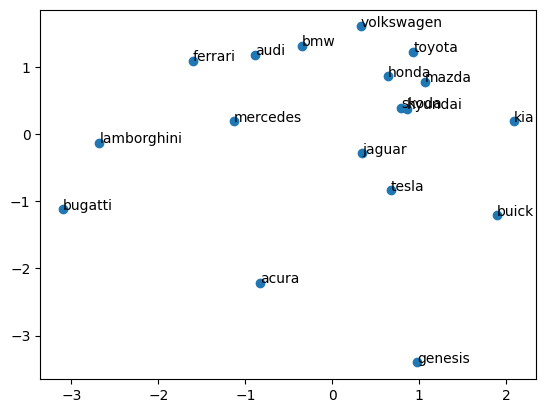

In [20]:
# repeat the process with a different pre-trained model and the same set of words. 
# What has changed in the embedding space? What might this have to do with the training data?
twitter_model= gensim.downloader.load("glove-twitter-100")


# Extract embeddings for the same set of words using the Twitter model
X_twitter = [twitter_model[word] for word in words if word in twitter_model]

# Perform PCA to reduce to 2 dimensions
X_twitter_pca = pca.fit_transform(X_twitter)

# Plot the 2D projection of the Twitter embeddings
plt.scatter(X_twitter_pca[:, 0], X_twitter_pca[:, 1])

for i, word in enumerate([word for word in words if word in twitter_model]):
    plt.annotate(word, (X_twitter_pca[i, 0], X_twitter_pca[i, 1]))

plt.show()

#i think we do see pattern in this one, more common and daily driven are shrugg together such as toyota, hyundai, honda, mazda, bmw, audi


Part 3: Embedding reddit posts

In [24]:
#read in uiuc csv
uiuc=pd.read_csv("uiuc.csv")
mich=pd.read_csv("umich.csv")

#sample so we have even number of samples from each dataset
mich=mich.sample(n=4725)

#assign labels based on origin subreddit of comment
uiuc['label']=1
mich['label']=0

#you will be working with the data csv for the rest of the question
data=pd.concat([uiuc,mich])




In [41]:
#using the code from project 1, clean the text and create a bag of words representation of the text
import spacy
language_model = spacy.load("en_core_web_sm")

def lemmatize(text):

   doc = language_model(text)

   tokens = [token.lemma_ for token in doc if not (token.is_stop or token.is_punct)]

   return ' '.join(tokens)

def clean(text):
    #remove newline and space characters
    text = ' '.join(text.split())
    #convert the text to lowercase
    text = text.lower()
    #remove punctuation
    text = ''.join([char for char in text if char.isalpha() or char.isspace()])
    return text

data['cleaned_text'] = data['text'].apply(clean)
data['lemmatized_text'] = data['cleaned_text'].apply(lemmatize)
#create a bag of words representation with count vectorizer
vectorizer = CountVectorizer(min_df=3, max_df=0.3, ngram_range=(1,2))
bag_of_words = vectorizer.fit_transform(data['lemmatized_text'])

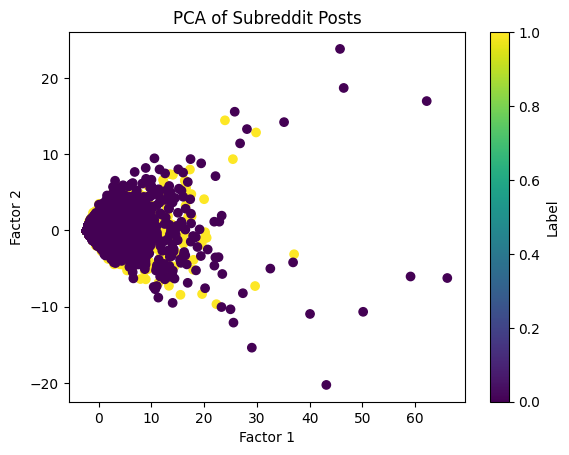

In [29]:
#using the embedding code from last week, plot a pca of all posts in the subreddits data set
from sklearn.decomposition import PCA

#using the embedding code from last week, plot a pca of all posts in the subreddits data set

#color by the "label" column to see if the two subreddits are separable in the embedding space

# is there a clear separation between the two columns? 

import matplotlib.pyplot as plt

# Calculate the PCA of the bag of words representation
pca = PCA(n_components=2)
X_pca = pca.fit_transform(bag_of_words.toarray())

# Plot the PCA with color-coded labels
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=data['label'], cmap='viridis')
plt.xlabel('Factor 1')
plt.ylabel('Factor 2')
plt.title('PCA of Subreddit Posts')
plt.colorbar(label='Label')
plt.show()

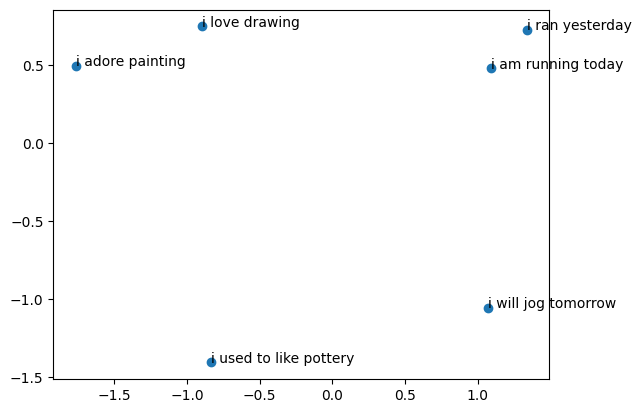

In [30]:
#here is a function to calculate the average embedding of a cleaned document
import numpy as np
#we can sum together all the embeddings to get a representation of all the concepts expressed in the document
def avg_embedding(sentence, model):
    words=sentence.split()
    embeddings=[model[word] for word in words if word in model]
    return np.mean(embeddings, axis=0)

sentences=["i am running today", "i will jog tomorrow", "i ran yesterday", "i love drawing", "i adore painting", "i used to like pottery"]

#we can then calculate the average embedding of each sentence

avg_embeddings=[avg_embedding(sentence, model) for sentence in sentences]

#we can then plot the pca of these embeddings

pca=PCA(n_components=2)

X_pca=pca.fit_transform(avg_embeddings)

plt.scatter(X_pca[:,0],X_pca[:,1])

for i, sentence in enumerate(sentences):
    plt.annotate(sentence, (X_pca[i,0],X_pca[i,1]))

plt.show()

/opt/anaconda3/envs/“is310”/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/anaconda3/envs/“is310”/lib/python3.9/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/var/folders/_4/9d4rktqs2gjfnv645k9q23rm0000gn/T/ipykernel_83497/344701843.py:22: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], cmap='viridis')


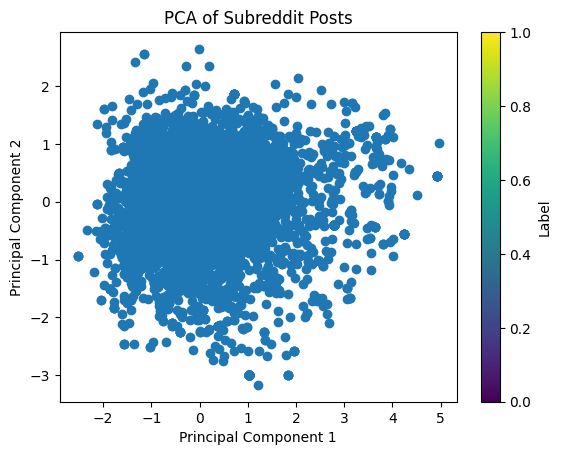

In [43]:

#use this function to calculate the average embedding of each post in the dataset

#plot the pca of the average embeddings, color by the "label" column

#how is this plot different from the previous one?

#is there clear separation? 
# Calculate average embeddings for each post in the dataset
average_embeddings = [avg_embedding(post, model) for post in data['lemmatized_text']]

# Filter to ensure all embeddings are of the expected shape
valid_embeddings = [embedding for embedding in average_embeddings if embedding.shape == (100,)]

# Convert the list of valid embeddings into a NumPy array
embedding_array = np.array(valid_embeddings)

# Perform PCA on the valid embeddings
pca_model = PCA(n_components=2)
reduced_embeddings = pca_model.fit_transform(embedding_array)

# Plotting the PCA results
plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Subreddit Posts')
plt.colorbar(label='Label')
plt.show()


Part 4: HuggingFace and BERT

In [4]:
!pip install transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 38.3 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 39.7 MB/s eta 0:00:00


In [44]:
#Please wait until after next week to start

# Use a pipeline as a high-level helper
from transformers import pipeline

#download bert model
pipe = pipeline("text-classification", model="finiteautomata/bertweet-base-sentiment-analysis")


/opt/anaconda3/envs/“is310”/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizers, configuration and file/data utilities can be used.
None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizers, configuration and file/data utilities can be used.


RuntimeError: At least one of TensorFlow 2.0 or PyTorch should be installed. To install TensorFlow 2.0, read the instructions at https://www.tensorflow.org/install/ To install PyTorch, read the instructions at https://pytorch.org/.

In [45]:
#use the pipeline to classify the sentiment of a sentence of your choice
pipe("I love this class")

NameError: name 'pipe' is not defined

In [ ]:
#use the pipeline to classify the sentiment of all posts in the reddit dataset
#report the most common sentiment label

In [ ]:
#look at ten sample posts and labels; do you agree with all of them? 

In [ ]:
#is the UIUC or Michigan subreddit more negative?